In [199]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
from itertools import product
from datetime import datetime
    

In [18]:
DATA_PATH = os.path.join("..", "data")
pod_names = [
    "adservice", "cartservice", "checkoutservice", "currencyservice", "emailservice", "frontend", "paymentservice", "productcatalogservice", "recommendationservice", "redis", "shippingservice",
]

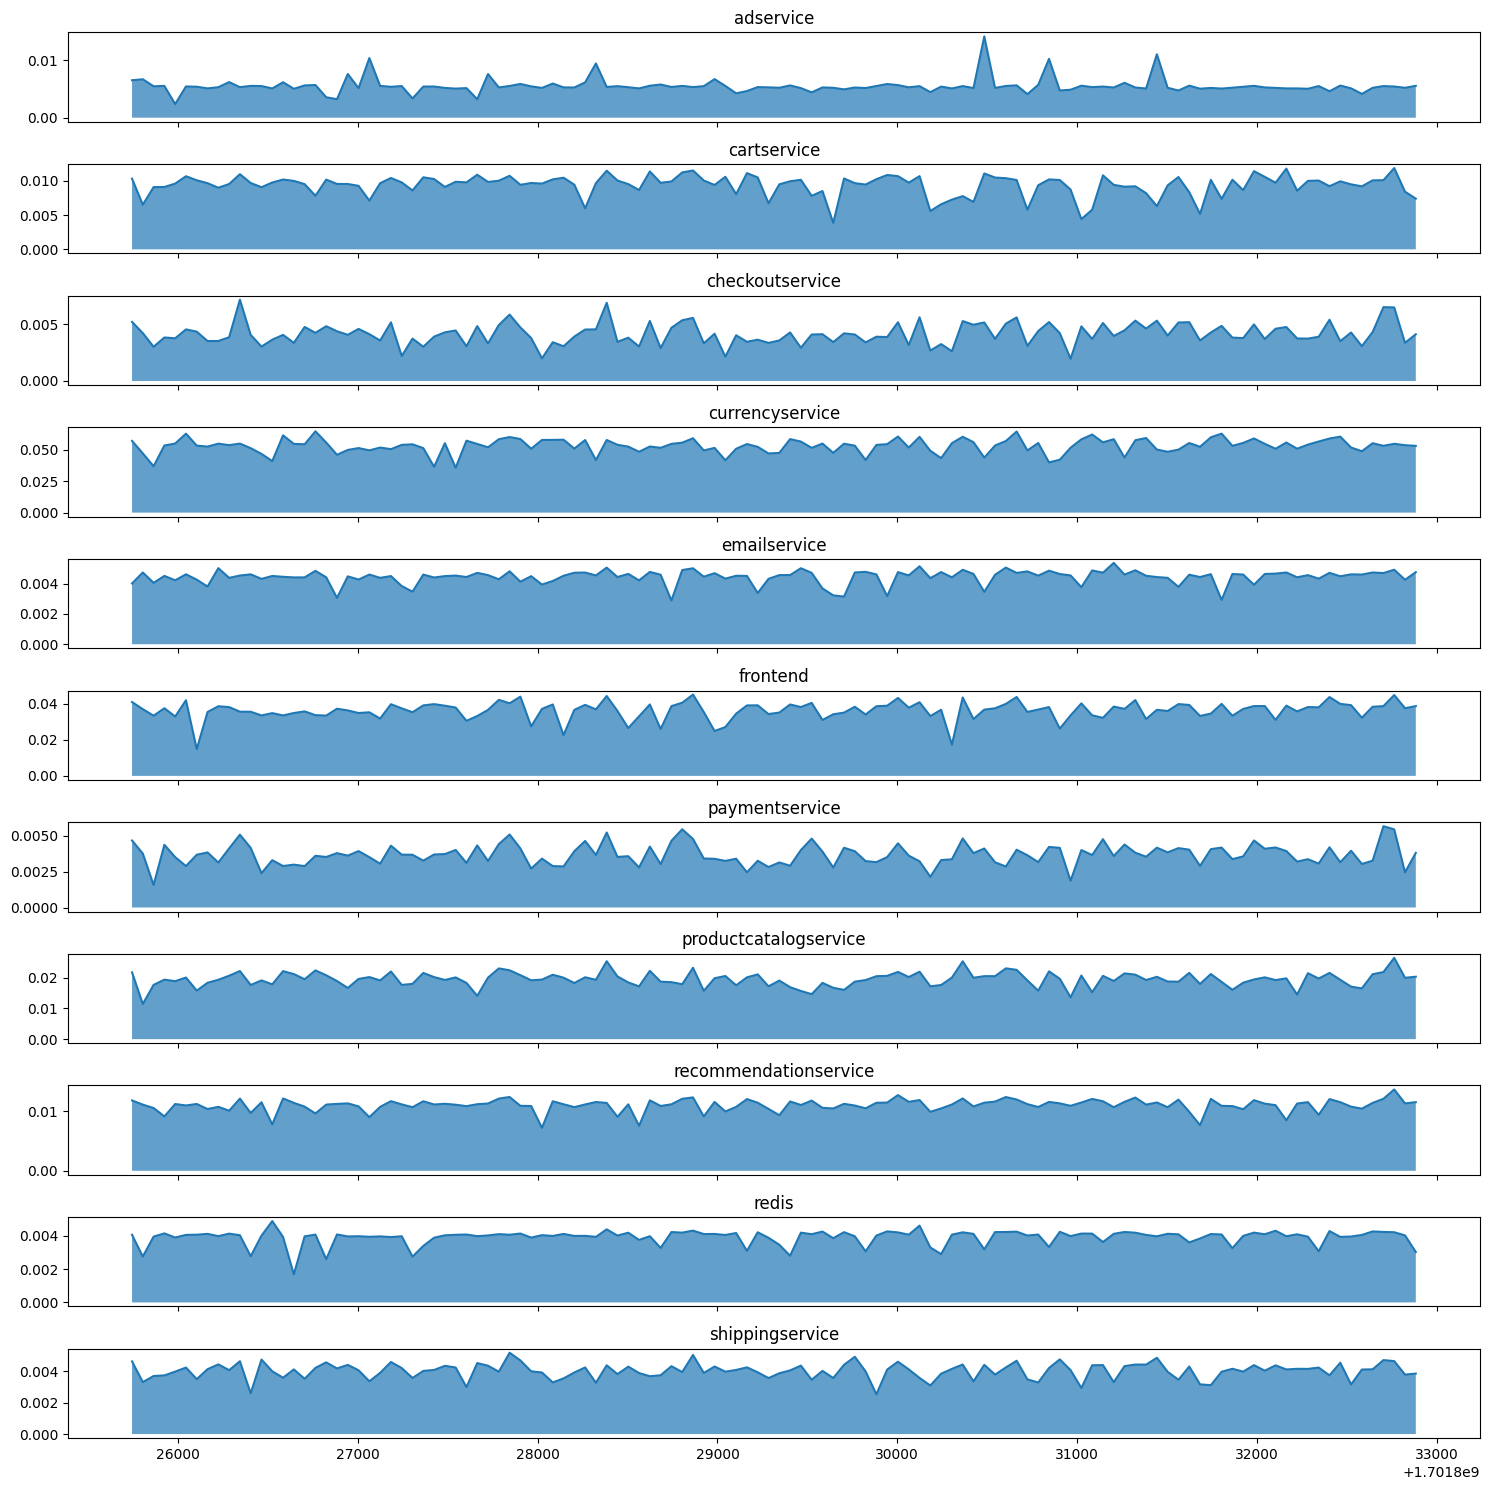

In [46]:
fig, axs = plt.subplots(11, figsize=(15, 15), sharex=True)

for i, pod in enumerate(pod_names):
    csv_path = os.path.join(DATA_PATH, f"{pod}_cpu.csv")
    df = pd.read_csv(csv_path).head(120)
    # df["timestamp_normalized"] = (df["timestamp"] - df["timestamp"].min()) / (df["timestamp"].max() - df["timestamp"].min())
    
    axs[i].plot(df["timestamp"], df["value"])
    axs[i].fill_between(df["timestamp"], 0, df["value"], alpha=0.7)
    axs[i].set_title(pod)

plt.tight_layout()

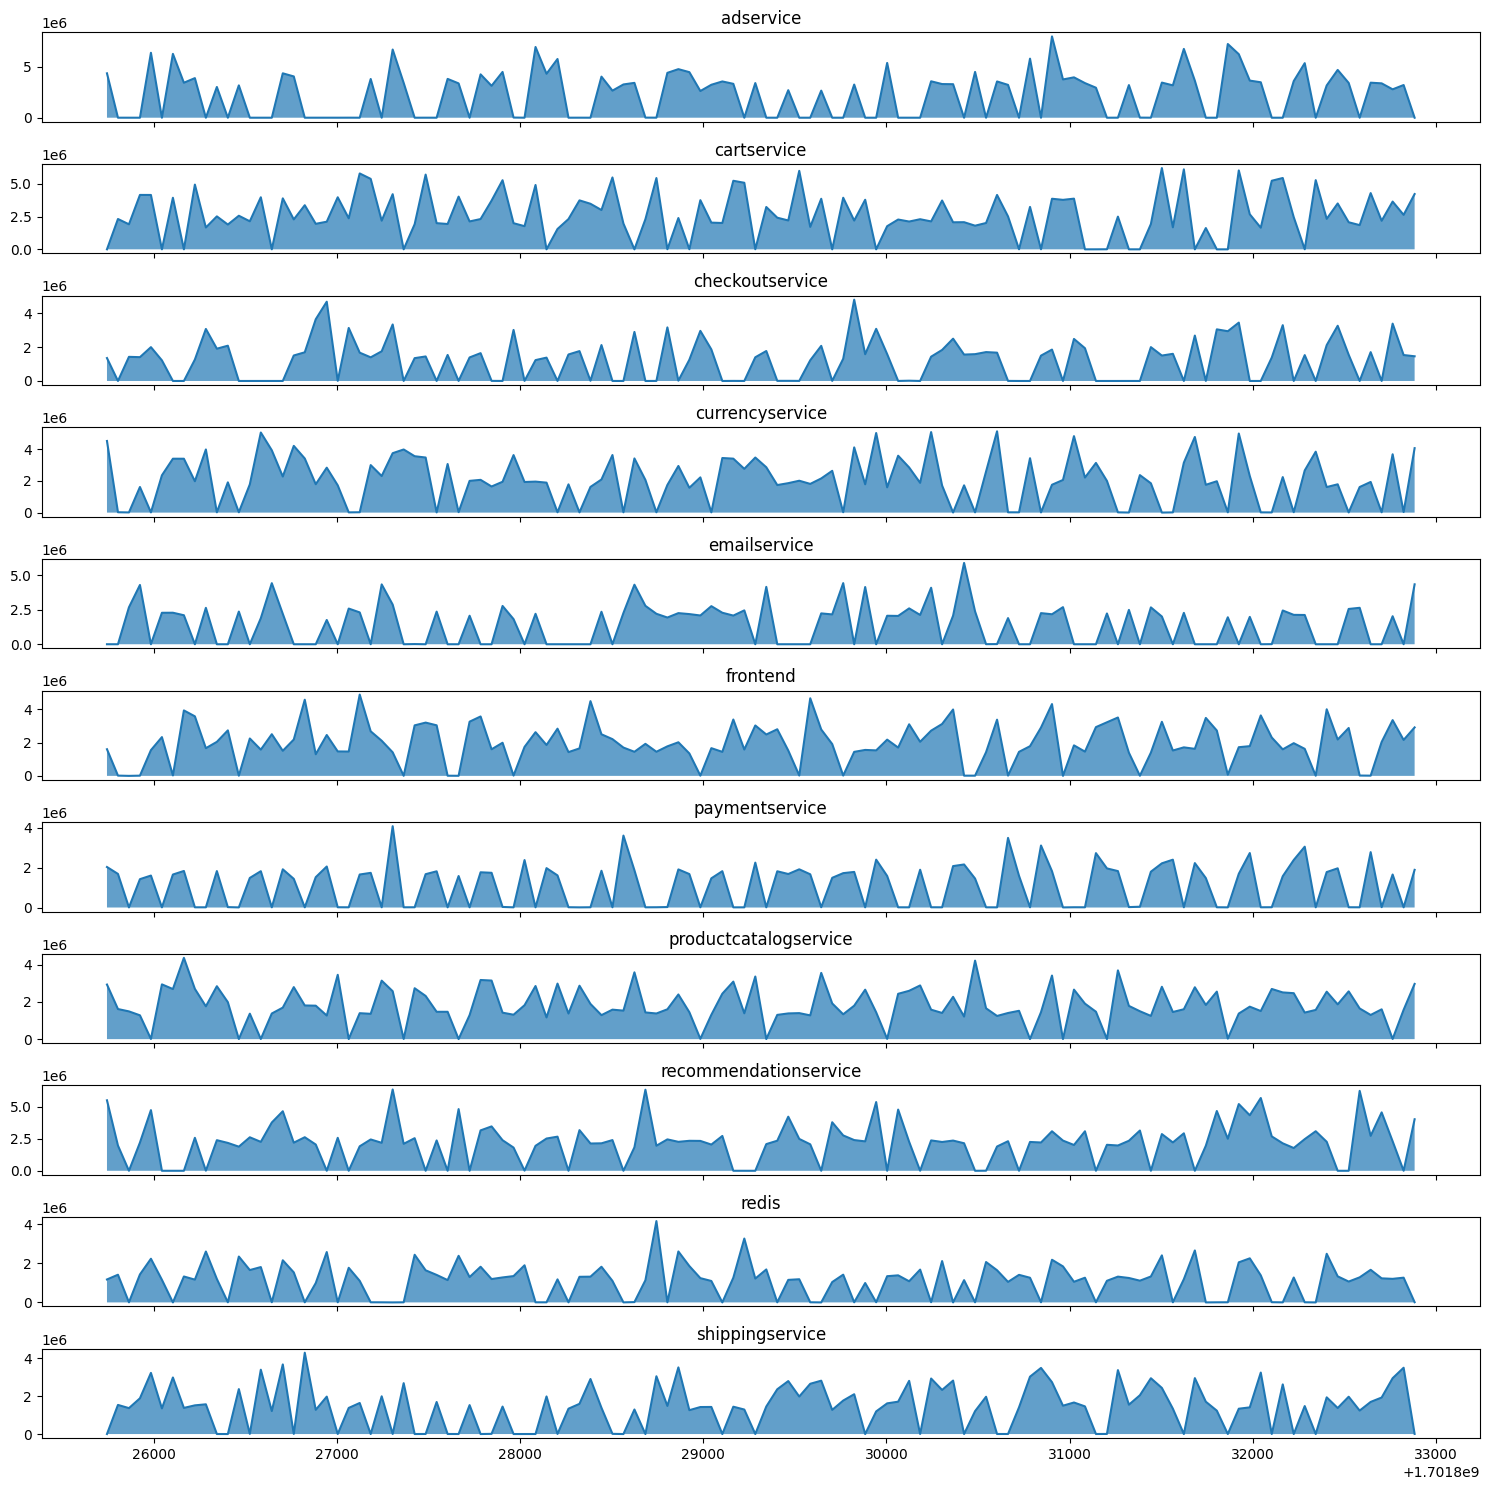

In [42]:
fig, axs = plt.subplots(11, figsize=(15, 15), sharex=True)

for i, pod in enumerate(pod_names):
    csv_path = os.path.join(DATA_PATH, f"{pod}_memory.csv")
    df = pd.read_csv(csv_path).head(120)
    # df["timestamp_normalized"] = (df["timestamp"] - df["timestamp"].min()) / (df["timestamp"].max() - df["timestamp"].min())
    
    axs[i].plot(df["timestamp"], df["value"])
    axs[i].fill_between(df["timestamp"], 0, df["value"], alpha=0.7)
    axs[i].set_title(pod)

plt.tight_layout()

In [212]:
csv_graph = os.path.join(DATA_PATH, "graph.csv")
df_graph = pd.read_csv(csv_graph)
df_timed_graph = df_graph.groupby("timestamp")

selected_t = np.random.choice(df_graph["timestamp"].unique(), 6)
selected_t.sort()

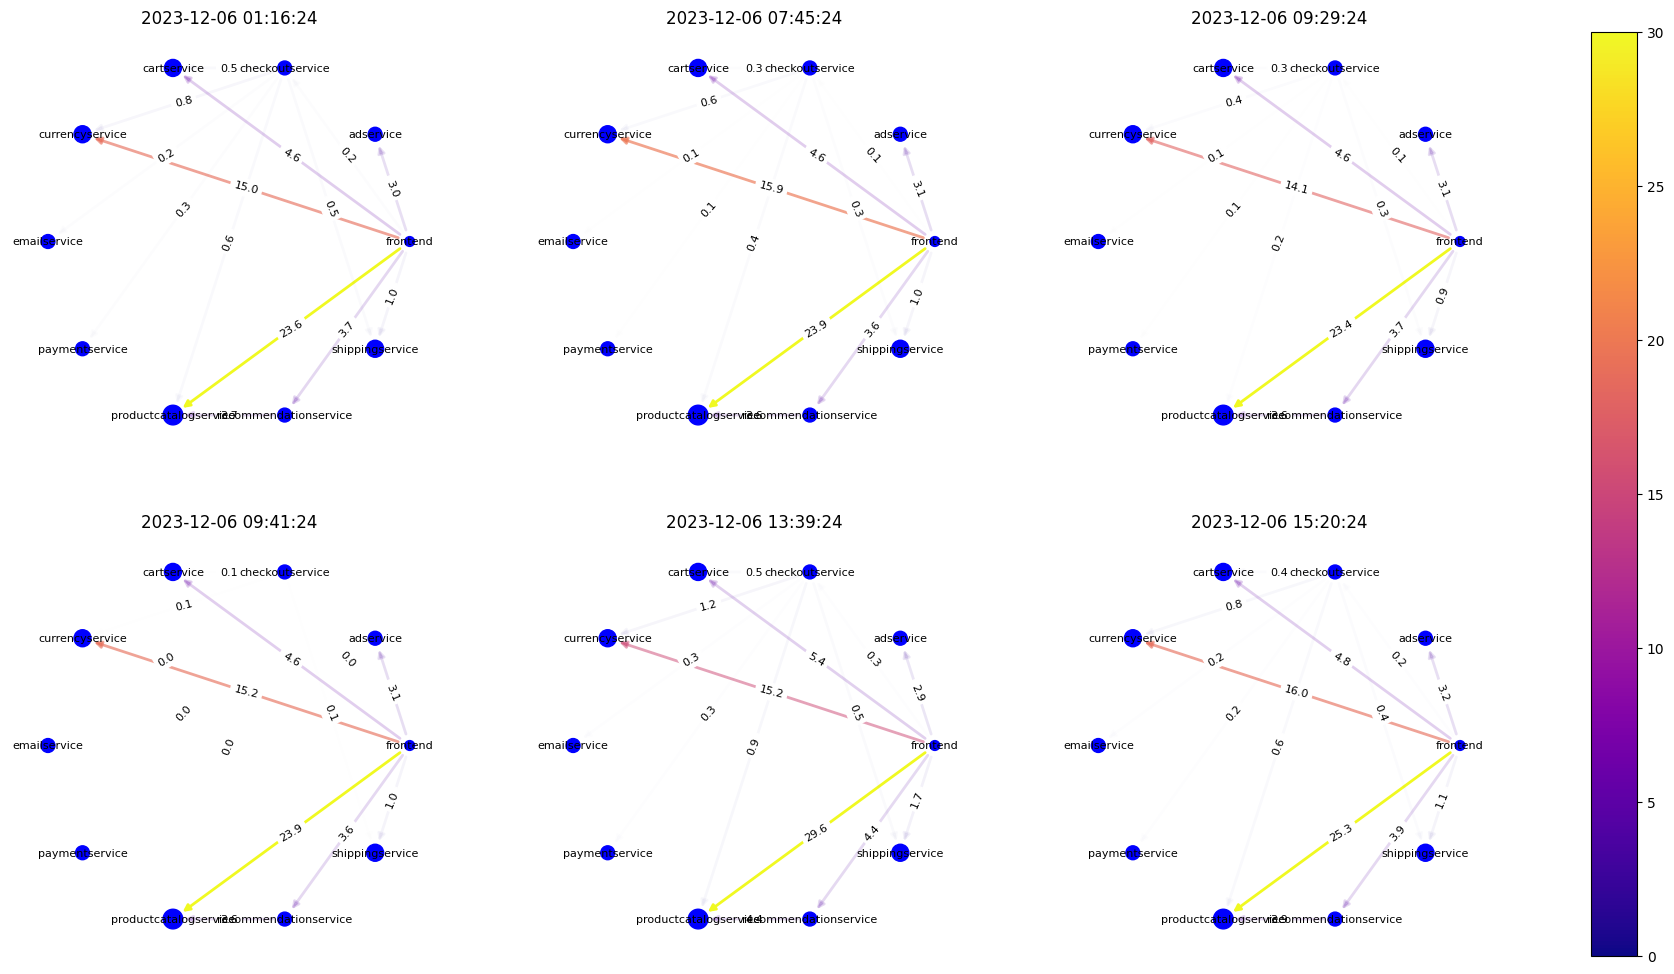

In [215]:
fig, axs = plt.subplots(2, 3, figsize=(24, 12), sharex=True)

for i, j in product(range(2), range(3)):
    plt.sca(axs[i, j])
    date = selected_t[i * 3 + j]
    
    t_timed_graph = df_timed_graph.get_group(date)
    G = nx.DiGraph()
    for idx, row in t_timed_graph.iterrows():
        G.add_edge(row["from"],  row["to"], weight=row["value"])
        
    pos = nx.circular_layout(G)
    node_sizes = 50 * (np.array(list(dict(G.in_degree).values())) + 1)
    edge_weights = np.array(list(nx.get_edge_attributes(G, "weight").values()))
    edges_alphas = edge_weights / edge_weights.max()
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="blue")
    edges = nx.draw_networkx_edges(G, pos, width=2, edge_cmap=plt.colormaps["plasma"], edge_color=edge_weights)
    
    edge_labels = {(u, v): f'{d["weight"]:.1f}' for u, v, d in G.edges(data=True)}
    nx.draw_networkx_labels(G, pos, font_size=8)
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)
    
    for k, edge in enumerate(edges):
        edge.set_alpha(edges_alphas[k])
    
    axs[i, j].set_title(datetime.fromtimestamp(date), fontsize=12)
    axs[i, j].set_axis_off()

sm = plt.cm.ScalarMappable(cmap=plt.colormaps["plasma"], norm=plt.Normalize(vmin=0, vmax=30))
sm.set_array([])
cbar = plt.colorbar(sm, ax=axs.ravel().tolist())